In [1]:
%pip install fastparquet "ipywidgets>=7.0.0" matplotlib pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 40.7 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/11.6 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 8.2/11.6 MB 247.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 171.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.2 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 12.2/12.2 MB 243.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 163.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 157.3 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.9 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.5 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 164.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.3 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 41.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd

def load_file_to_df(file_name: str) -> pd.DataFrame:
    if os.getcwd() == "/drive":
        data = pd.read_parquet(f'/drive/{file_name}')
    else:
        data = pd.read_parquet(f'{os.getenv("DATA_DIR")}/marts/{file_name}')

    return data

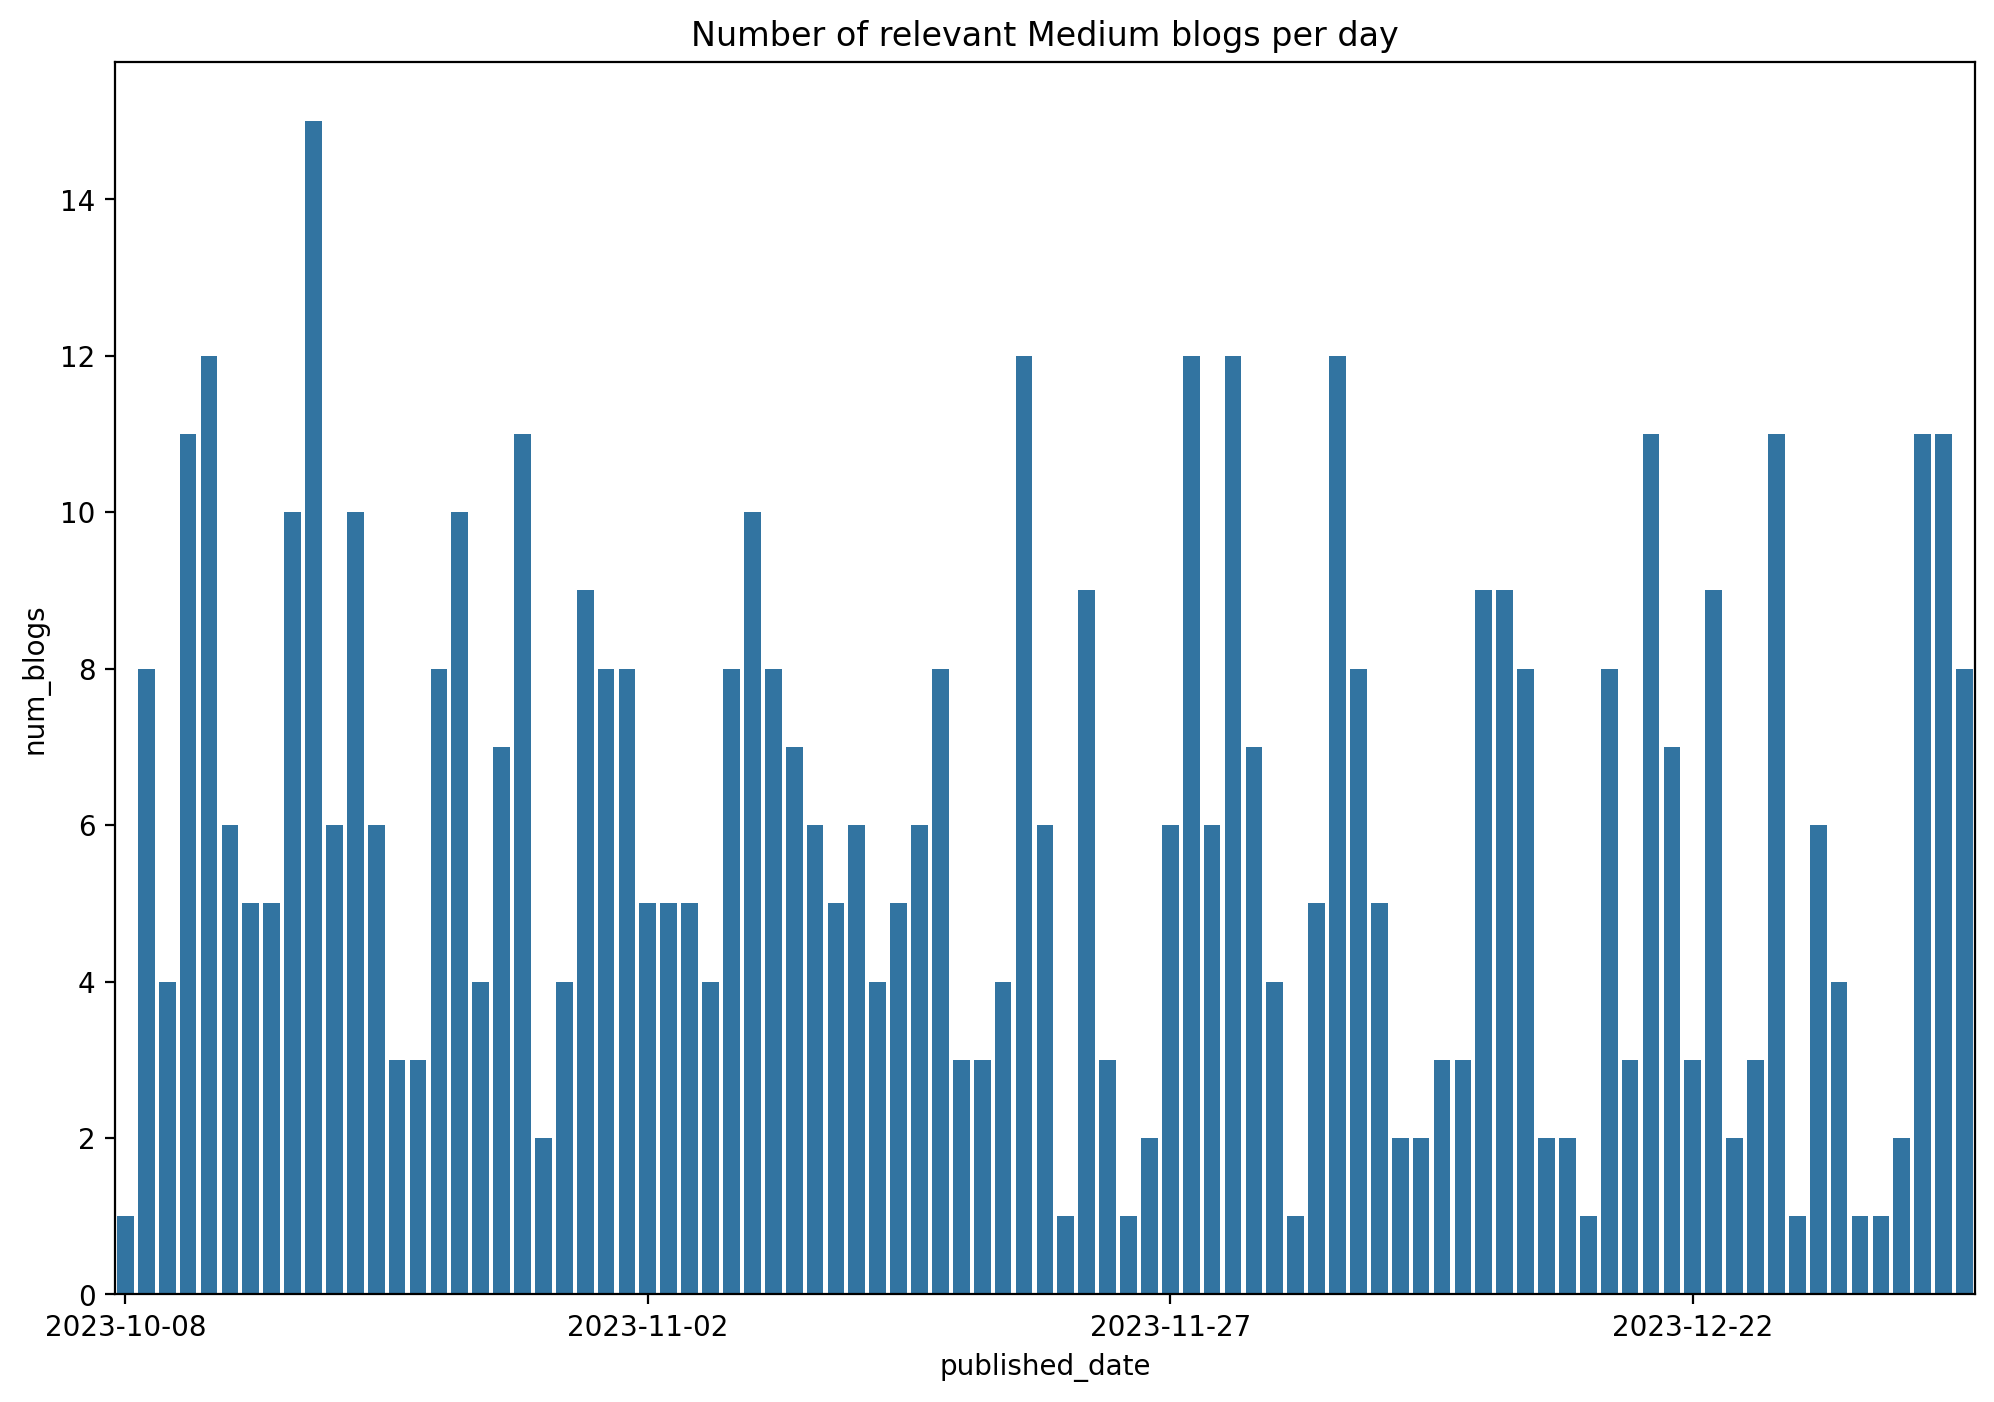

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = load_file_to_df("fct_medium_blogs.parquet")
df_blogs_per_day = df.groupby(["published_date"])["story_url"].count().rename("num_blogs").sort_index().reset_index()
df_blogs_per_day["published_date"] = pd.to_datetime(df_blogs_per_day["published_date"])
df_blogs_per_day = df_blogs_per_day[df_blogs_per_day["published_date"] > (datetime.utcnow()- pd.Timedelta(days=90))]

fig, ax = plt.subplots(figsize=(12,8), dpi= 200)    
plt.title("Number of relevant Medium blogs per day")
fig = sns.barplot(x = "published_date", y = "num_blogs", data = df_blogs_per_day, estimator = sum, errorbar=None, ax=ax)
x_dates = df_blogs_per_day['published_date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))

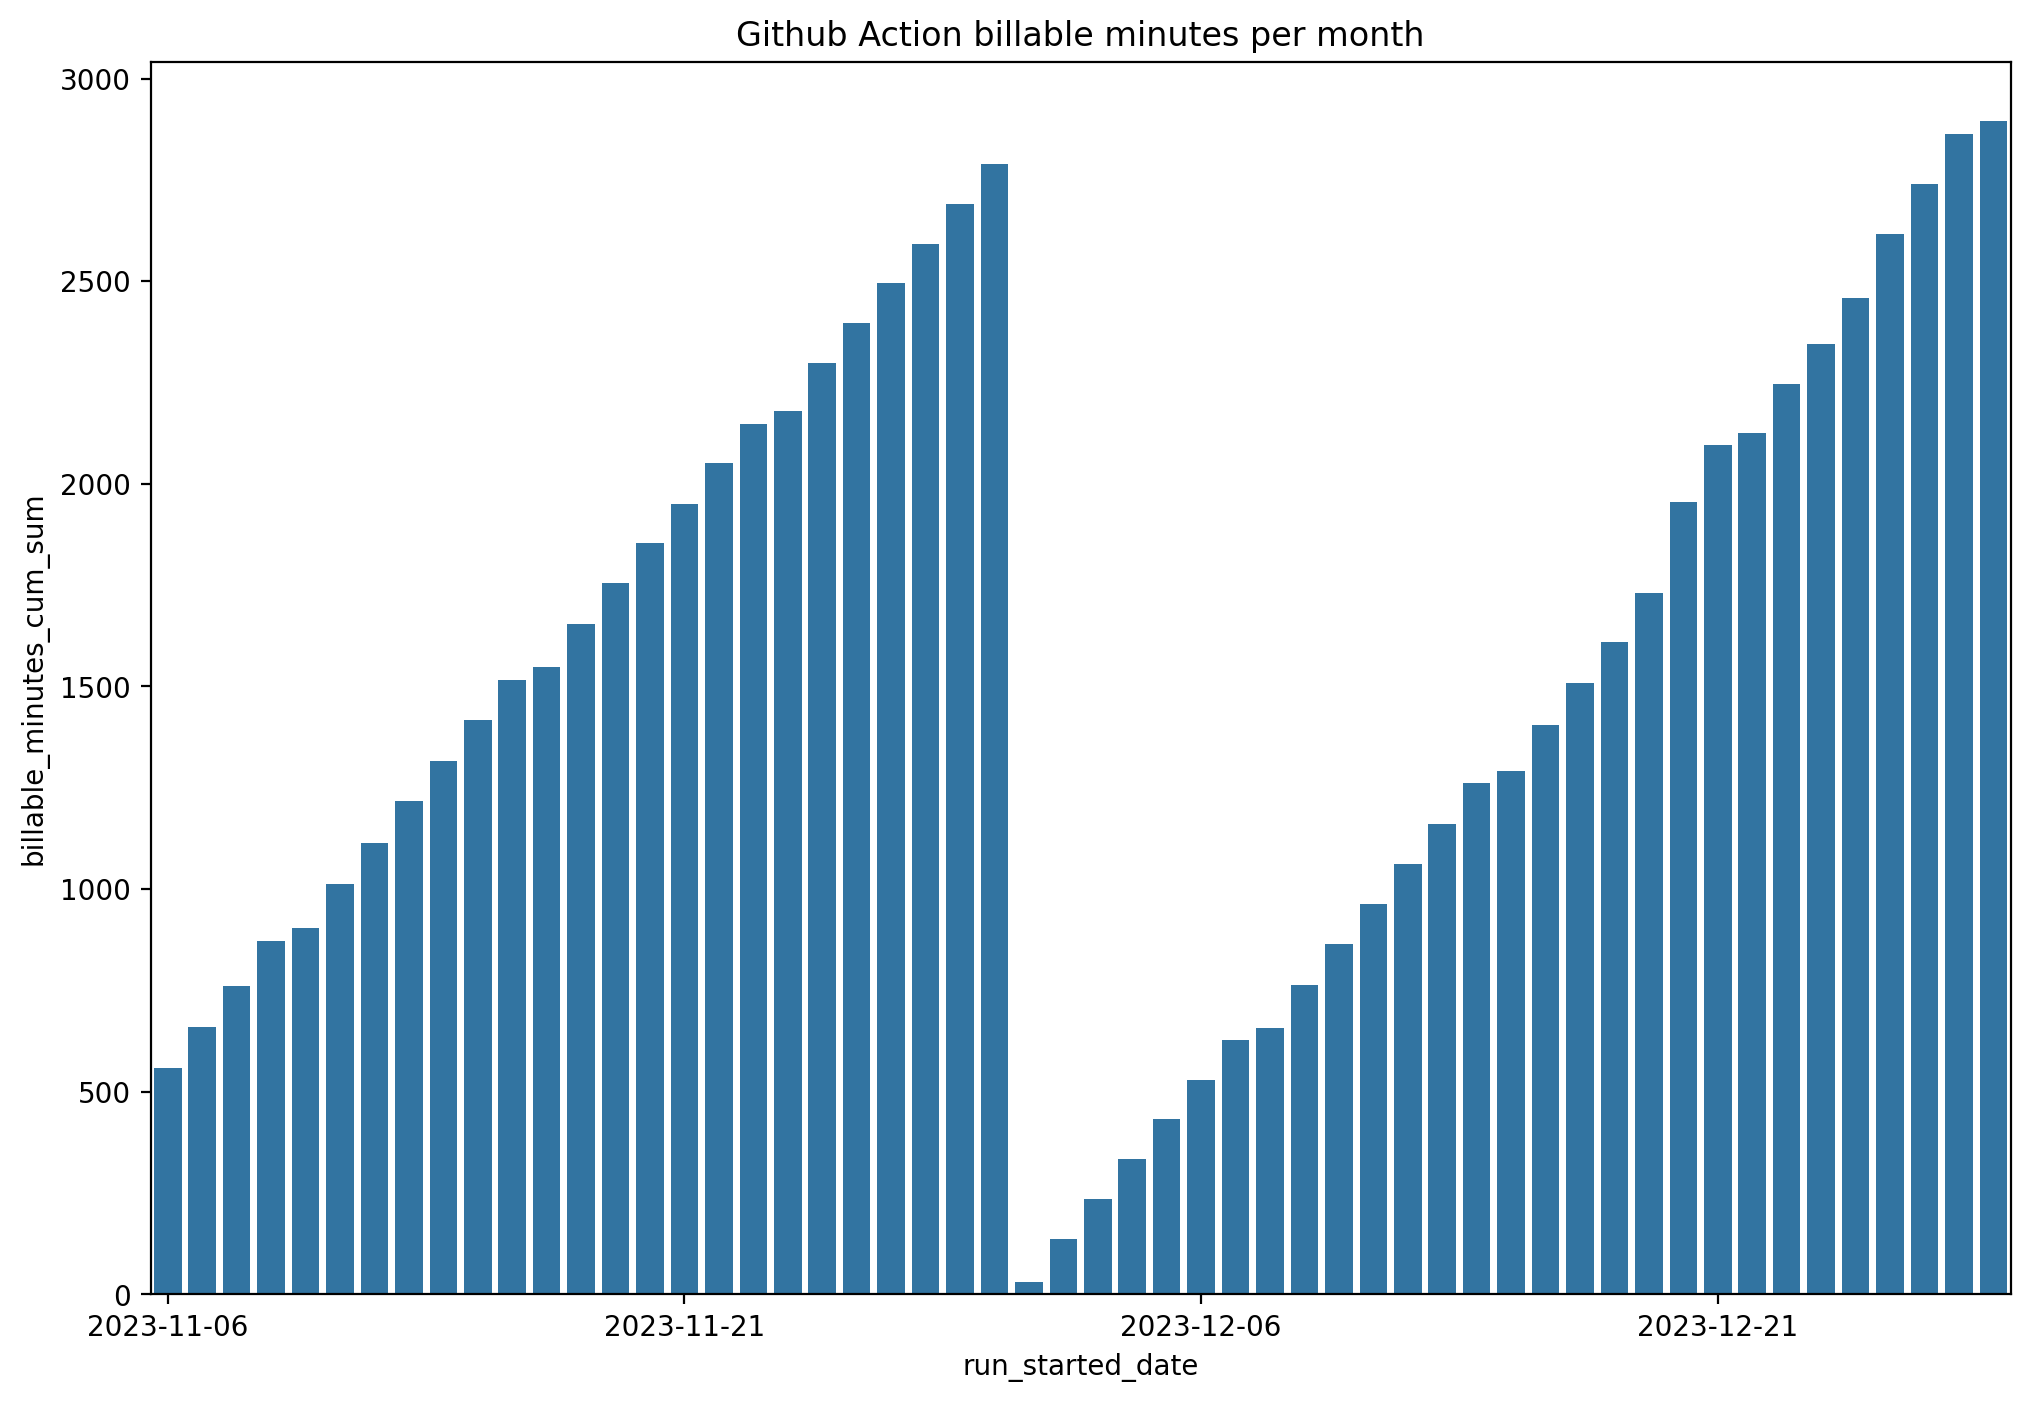

In [4]:
df_github_action_usage = load_file_to_df("reports/rpt_github_action_usage.parquet")
df_github_action_usage.index = df_github_action_usage["run_started_date"]
df_github_action_usage.drop(columns=["run_started_date"], inplace=True)

fig, ax = plt.subplots(figsize=(12,8), dpi= 200)    
plt.title("Github Action billable minutes per month")
fig = sns.barplot(x = "run_started_date", y = "billable_minutes_cum_sum", data = df_github_action_usage, ax=ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))